# Deep Learning using Keras framework

Here we will consider classification problem using two different neural network architecture on the MNIST dataset.


 * TASK : Multi-class classification (10 different classes of MNIST dataset)
 * Dataset: MNIST dataset. A dataset of hand written digits from 0 to 9
 * This dataset comes pre-loaded with keras installation
  
 * MNIST dataset is like "hello world" implementation in Machine learning
 * More details on this: http://yann.lecun.com/exdb/mnist/
 
 * Neural networks: Feed forward neual network (FFNN) and Convolutional neural network (CNN)




## Example1: Feed forward neural network (Multi-layer perceptron)


In [1]:
# Lets load the necessary libraries first

import keras
import numpy as np      # keras is loaded with Tensorflow backend (which is the default)

Using TensorFlow backend.


In [2]:
# 1. Loading the dataset

from keras.datasets import mnist

# Use load_data() function to load the data and split it between the training and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Lets look at the shape of the data partitions

print(x_train.shape)
print(y_train.shape)

print(y_train[0:5])


(60000, 28, 28)
(60000,)
[5 0 4 1 9]


 * From the above, we find that x_train has 60000 records/samples each of shape 28 x 28. In other words, each handwritten sample/digit is of 28x28 dimension
 * And y_train holds the associated labels: 0 to 9 indicating the digits id
 

In [4]:
# 2. Preparing the data

# Since we are using fully connected layers only: we need to convert the image 28x28 dimension into a single
# dimensional vector/array. Lets do it using the reshape function of numpy

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32') # make the datatype to be of floating type
x_test = x_test.astype('float32')


In [5]:
# Let's look at the maximum element

print(np.max(np.max(x_train,axis=0)))

255.0


In [6]:
# Data transformation: We normalise the data by scaling them to 0-1 range 

x_train /= 255     #divide by the maximum element in the dataset (which is 255 as the image is gray scale)
x_test /= 255      # pythonic way-every element in this array is divided by 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [7]:
# Now if we check the maximum element - it will be 1

print(np.max(np.max(x_train,axis=0))) #the inputs are transformed to 0-1 range

1.0


In [8]:
# 3. Prepare the class labels

num_classes = 10   # we know MNIST has 10 classes (0 to 9)

# We convert class vectors to binary class matrices
# this is also called one-hot vector representation where only the corresponding class would have a 1 and the 
# remaining 9 elements would have 0 in this vector representation.

# keras provides a handy function to do this: keras.utils.to_categorical()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
# Lets see how the one-hot vector now looks like

print(y_train[0:10])  # printing the first 10 labels

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [10]:
# 4. Now its time to define the model/network architecture

from keras.models import Sequential       #this tutorial uses Sequential models
from keras.layers import Dense, Dropout

data_shape = (784,) #as we flatten the 28x28 dimensional image

# 1. Create a Sequential model object. Then just keep adding layers
model = Sequential() 

# 2. Add series of layers to create the network. The first layer needs input_shape information.

model.add(Dense(512, activation='relu', input_shape=data_shape)) 
model.add(Dropout(0.2))  
model.add(Dense(512, activation='relu')) #
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Dense - fully connected layers
# activation - rectified linear unit (relu). Thresholds data/values at 0 if its negative 
# Dropout(0.2) - drops 20% of the input values randomly, to combat overfitting during training
# softmax - outputs probability distribution (0-1) between 10 classes

In [11]:
# Let us visualise our neural network architecture

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


#### PS: To learn more 

 * About dropout : http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf
 * ReLU : https://arxiv.org/pdf/1803.08375.pdf


In [12]:
# 5. The compilation step: configure our model parameters for training

from keras.optimizers import RMSprop  # you have to import the class to use it

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

We pass three main parameters to the compile function (which are important). These are
 * loss
 * optimizer
 * metrics 

#### Loss functions
 * what loss function should be optimised during gradient descent? We chose categorical cross entropy because we are dealing with multi-class classification problem (if it was a binar classification problem, we could have chosen binary crossentropy)
 * See https://keras.io/losses/

#### Keras optimisers
 * optimiser parameter is used to define the optimiser to be used during training. We chose RMSprop here.
 * RMSprop is one kind of optimiser that performs stochastic gradient descend to update the model parameters through backpropagation
 * Keras supports many other optimisers. See here: https://keras.io/optimizers/
 * PS: ADAM optimiser is often a default choice now adays
 
#### Metrics
 * parameter we chose to evaluate the performance of our model. In the current setup we use accuracy to judge the model performance.
 * Details: https://keras.io/metrics/

Note: "A metric function is similar to a loss function, except that the results from evaluating a metric are not used when training the model. You may use any of the loss functions as a metric function."
 
 

In [13]:
# 6. Now lets train the model
# training a model in keras simply requires calling the fit() function by passing the necessary parameters
# just like the way we do in Scikit-Learn framework

batch_size = 128
num_classes = 10
epochs = 5      


history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# The fit() function returns the training history/logs that we could use later to 
# analyse training, validation lossess and accuracy

# Beware: Depending upon the epochs parameter you specify, the training time may vary

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 202us/step - loss: 0.2457 - accuracy: 0.9245 - val_loss: 0.0984 - val_accuracy: 0.9695
Epoch 2/5
60000/60000 [==============================] - 11s 181us/step - loss: 0.1013 - accuracy: 0.9697 - val_loss: 0.0828 - val_accuracy: 0.9750
Epoch 3/5
60000/60000 [==============================] - 8s 140us/step - loss: 0.0729 - accuracy: 0.9785 - val_loss: 0.0795 - val_accuracy: 0.9785
Epoch 4/5
60000/60000 [==============================] - 8s 134us/step - loss: 0.0584 - accuracy: 0.9827 - val_loss: 0.0826 - val_accuracy: 0.9781
Epoch 5/5
60000/60000 [==============================] - 8s 140us/step - loss: 0.0494 - accuracy: 0.9855 - val_loss: 0.0717 - val_accuracy: 0.9810


### Lets plot the training and validation loss using the history object that was returned after model training

In [14]:
import matplotlib.pyplot as plt   # we need to import the matplot lib libraries first

history_dict = history.history

#print(history_dict)

In [15]:
# lets extract the training and validation loss

train_loss = history_dict['loss']   #'loss' denotes training loss - standard naming convention used by keras
val_loss = history_dict['val_loss'] #'val_loss' denotes validation loss

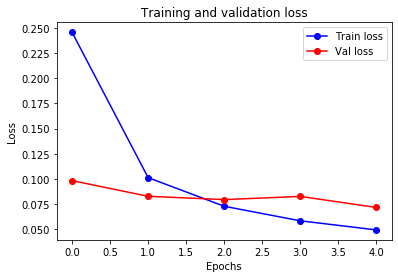

In [16]:
# We now plot the two loss curves in the same figure

plt.plot(train_loss,'bo-',label='Train loss')
plt.plot(val_loss,'ro-',label='Val loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

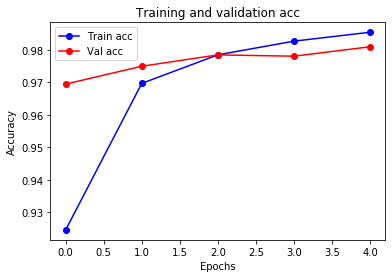

In [17]:
# Now let us also plot the training and validation accuracy

train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(train_acc,'bo-',label='Train acc')
plt.plot(val_acc,'ro-',label='Val acc')

plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [18]:
# 7. Finally, we test our model performance on the test data
# For this we simly call evaluate() function passing the test data

test_loss,test_acc = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Test loss: 0.07166362829704521
Test accuracy: 0.9810000061988831


# Example 2: Convolutional neural network

In [19]:
# Code copied from
# https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10

epochs = 5

# Define the input shape
img_rows, img_cols = 28, 28

# Load and split the dataset between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':   # format used by other backends:     
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    print('Tensorflow backend')
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255     # normalisation: scaling the input values to 0-1 range
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# Tensorflow backend uses: (Batchsize, height, width, channel) format
# Other backends (Theano, CNTK) uses: (Channel, height, width, Batchsize)  format

Tensorflow backend
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [20]:
# Build the Convolutional neural network model

model = Sequential()

# The first conv layer uses 32 feature maps and a filter/kernel of 3x3, followed by ReLU activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

# The second conv layer uses 64 feature maps and a filter/kernel of 3x3, followed by ReLU activation
# This is followed by a max-pooling layer (downsampling the input spatial dimension)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())                      # converts matrix into a vector (1D shape)
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax')) # This is the output layer

# summary of architecture
# Input => Conv+activation => Conv+activation+relu => dropout+flatten+dense+relu => dropout+dense+softmax 

In [21]:
# lets visualise the CNN model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [22]:
# Lets configure the model parameters by setting parameters to compile() method

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Here we use same categorical crossentropy loss as its a multiclass classification problem
# But here we try a different optimiser. We use Adadelta

# TIPS: try chaging the optimiser to adam! and see how training and testing results changes

# Please be aware that training this CNN may take some time - and you may face issues if your laptop hardware is 
# old.

In [23]:
# Now we are ready to train the model
# Just call the fit() method passing the necessary parameters: data, labels, number of training epochs etc.

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 118s 2ms/step - loss: 0.2640 - accuracy: 0.9182 - val_loss: 0.0545 - val_accuracy: 0.9820
Epoch 2/5
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0898 - accuracy: 0.9735 - val_loss: 0.0401 - val_accuracy: 0.9865
Epoch 3/5
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0669 - accuracy: 0.9807 - val_loss: 0.0358 - val_accuracy: 0.9887
Epoch 4/5
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0559 - accuracy: 0.9829 - val_loss: 0.0315 - val_accuracy: 0.9883
Epoch 5/5
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0470 - accuracy: 0.9859 - val_loss: 0.0287 - val_accuracy: 0.9897


In [24]:
# Finally, evaluate the CNN performance on the test data

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028739621388640082
Test accuracy: 0.9897000193595886


# Exercises

 * Try and see how the performances of these model varies when you run them for a larger epochs (say 10, 15, 20). Please be aware that increasing epochs means it will take more time to finish the training.
 * Furthermore, change the optimiser to Adam and see how it compares with other optimiser. 
 * See  https://keras.io/optimizers/ for details on other optimisers supported by Keras


# Examples in Keras github

You will find lot of examples of different neural network models along with some renowned pre-trained models in the following github link

https://github.com/keras-team/keras/tree/master/examples


You can play around with examples and adapt it in your work !